# PCA Lab

## Introduction

Up to this point, we've been looking at _supervised learning_. That is building
models using labeled data. This lab is the first step in using unsupervised
techniques. With unsupervised methods there are no training labels, we're looking
for patterns that arise out of the data itself.

PCA is not a classification tool though, it's useful for preprocessing
your data to reduce its dimensionality or making it easier to work with.

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()


## PCA
First, let's generate some random data to illustrate dimensionality reduction.

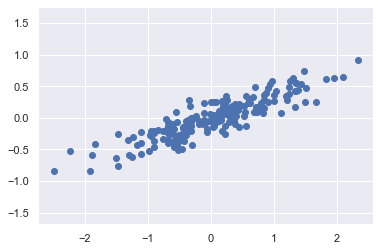

In [3]:
ran = np.random.RandomState(1)
X = np.dot(ran.rand(2, 2), ran.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

It's clear there's a linear relationship between X & Y. Let's explore this relationship
with PCA.

First, import class from SKLearn and generate some basic statistics
of the data.

In [4]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X)
print("components:\n", pca.components_)
print("explained variance:\n", pca.explained_variance_)
print("mean:\n", pca.mean_)
print("covariance:\n", pca.get_covariance())

components:
 [[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]
explained variance:
 [0.7625315 0.0184779]
mean:
 [ 0.03351168 -0.00408072]
covariance:
 [[0.68217761 0.23093475]
 [0.23093475 0.09883179]]


- `components` - these are the principal axes (vectors) in the feature space and the directions of maximum variance. These are your eigenvectors.
- `explained variance` - The amount of variance explained by each of the principal components, equal to the largest eigenvalues of the covariance matrix of the input data.
- `mean` - Per-feature empirical mean, estimated from the training set.
- `covariance` - estimated covariance matrix of the training data

Next let's plot the principal components against the original data.

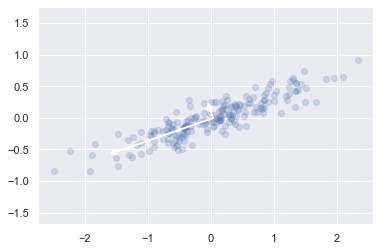

In [12]:
def draw_component(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrow = dict(arrowstyle='->', linewidth=2, shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrow)

# plot data
scaling_factor = 3
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    # explained variance is squared length
    v = scaling_factor * vector * np.sqrt(length)
    draw_component(pca.mean_, pca.mean_ + v)
plt.axis('equal');

The two new axes show the direction and magnitude of the principal components of the
data. The lengths of the vectors indicate their "importance" i.e. how much
variance they contain when projected onto that axis.

## Reduce Dimensions

We can use these components to reduce the dimensionality of our data.

In [15]:
pca = PCA(n_components=1)
pca.fit(X)
X_pcad = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pcad.shape)

original shape:    (200, 2)
transformed shape: (200, 1)


Boom! We just reduced our y dimension by 100%!

Let's look at the plot of this "new data set" against our original.

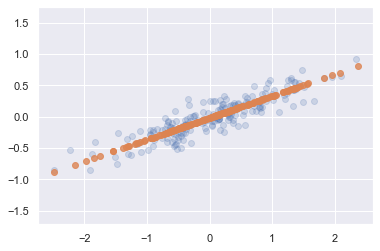

In [16]:
X_new = pca.inverse_transform(X_pcad)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal');

Ok, how do we use this with a classifier? Let's look at how to use PCA with a Decision Tree classifier
on the Wisconsin Breast Cancer data set.

In [28]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split


raw_data = load_breast_cancer()
raw_data_frame = pd.DataFrame(raw_data["data"], columns = raw_data["feature_names"])

# Standardize the data set. Standardization refers to transforming all of the data
# set so that each feature is roughly the same size.
# https://machinelearningmastery.com/normalize-standardize-machine-learning-data-weka/
data_scaler = StandardScaler()
data_scaler.fit(raw_data_frame)
scaled_data_frame = data_scaler.transform(raw_data_frame)

X_train, X_test, y_train, y_test = train_test_split(scaled_data_frame,
                                                    raw_data["target"],
                                                    test_size=0.3,
                                                    random_state=42,
                                                    stratify=raw_data["target"])

classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)
print("DT Accuracy vanilla: ", classifier.score(X_test, y_test))
print()
print(f"# of original features: {scaled_data_frame.shape[1]}")
print()

def do_the_pca_now(n_components):
    pca = PCA(n_components)
    pca.fit(X_train)
    x_train_pcad = pca.transform(X_train)
    print(f"# of 'features' post-PCA transform: {x_train_pcad.shape[1]}")

    classifier.fit(x_train_pcad, y_train)
    # don't refit the PCA
    x_test_pcad = pca.transform(X_test)
    print("DT Accuracy: ", classifier.score(x_test_pcad, y_test))
    print()

do_the_pca_now(1)
do_the_pca_now(2)
do_the_pca_now(5)
do_the_pca_now(10)
do_the_pca_now(15)
do_the_pca_now(25)
do_the_pca_now(30)

DT Accuracy vanilla:  0.9298245614035088

# of original features: 30

# of 'features' post-PCA transform: 1
DT Accuracy:  0.8830409356725146

# of 'features' post-PCA transform: 2
DT Accuracy:  0.9473684210526315

# of 'features' post-PCA transform: 5
DT Accuracy:  0.9181286549707602

# of 'features' post-PCA transform: 10
DT Accuracy:  0.9415204678362573

# of 'features' post-PCA transform: 15
DT Accuracy:  0.9298245614035088

# of 'features' post-PCA transform: 25
DT Accuracy:  0.9122807017543859

# of 'features' post-PCA transform: 30
DT Accuracy:  0.8830409356725146

